In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

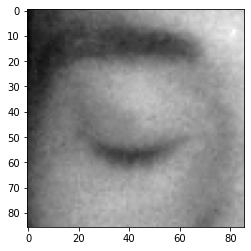

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(86, 86)

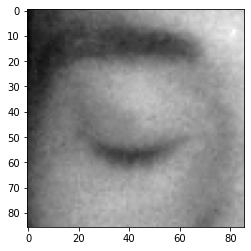

In [5]:
Datadirectory = "Test_Dataset/"
Classes = ["Closed_eyes", "Opened_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        break
    break

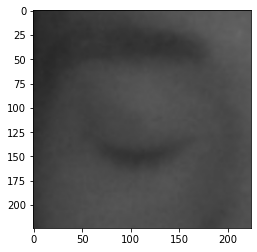

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

4256


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(4256, 224, 224, 3)

In [13]:
X = X / 255.0;

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.mobilenet.MobileNet()

In [24]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-4].output

In [27]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [30]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
new_model.fit(X, Y, epochs = 1, validation_split = 0.1)

 15/120 [==>...........................] - ETA: 5:43 - loss: 0.3811 - accuracy: 0.8667

KeyboardInterrupt: 

In [27]:
new_model.save('my_model.h5')

In [28]:
new_model = tf.keras.models.load_model('my_model.h5')

In [32]:
img_array = cv2.imread("Test_Dataset/Closed_eyes/s0001_00597_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [33]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [34]:
X_input.shape

(1, 224, 224, 3)

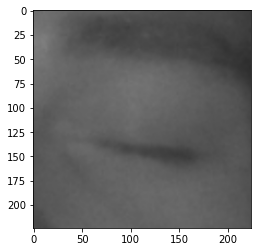

In [35]:
plt.imshow(new_array)

In [36]:
X_input = X_input/255.0

In [37]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 1s/step


In [38]:
prediction

array([[3.6413546e-09]], dtype=float32)

In [39]:
img = cv2.imread('closed_eyes.jpg')

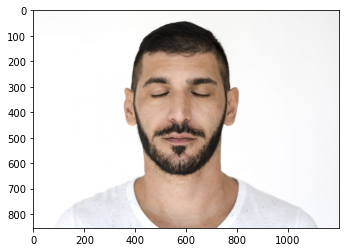

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [44]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [45]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

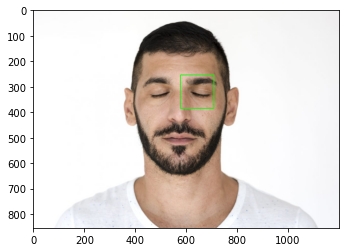

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [47]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

eyes are not detected


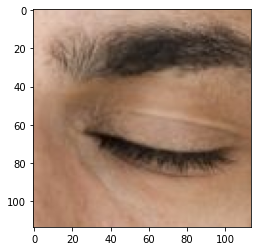

In [48]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [49]:
eyes_roi.shape

(114, 114, 3)

In [50]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255.0

In [51]:
final_image.shape

(1, 224, 224, 3)

In [52]:
new_model.predict(final_image)

1/1 [==============================] - 0s 51ms/step


array([[5.234145e-10]], dtype=float32)

In [3]:
import winsound
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
frequency = 2500
duration = 1000

new_model = tf.keras.models.load_model('my_model.h5')

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 20)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/ 255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions > 0.01):
        status = "Open Eyes"
        print(Predictions)
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0, 255, 0),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0.255,0), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0, 0, 255),
                   2,
                   cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter > 5:
            
            x1, y1, w1, h1 = 0, 0, 175, 75
            
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            
            cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
            
        
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

False
1/1 [==============================] - 1s 500ms/step
[[0.9934976]]
False
1/1 [==============================] - 0s 52ms/step
[[0.99285746]]
False
1/1 [==============================] - 0s 45ms/step
[[0.9823591]]
False
1/1 [==============================] - 0s 48ms/step
[[0.9977181]]
False
1/1 [==============================] - 0s 45ms/step
[[0.9931313]]
False
1/1 [==============================] - 0s 53ms/step
[[0.7051094]]
False
1/1 [==============================] - 0s 48ms/step
[[0.99078894]]
False
1/1 [==============================] - 0s 56ms/step
[[0.9630198]]
False
1/1 [==============================] - 0s 58ms/step
[[0.8595703]]
False
1/1 [==============================] - 0s 58ms/step
[[0.997483]]
False
1/1 [==============================] - 0s 62ms/step
[[0.9972686]]
False
1/1 [==============================] - 0s 58ms/step
False
1/1 [==============================] - 0s 64ms/step
[[0.9990258]]
False
1/1 [==============================] - 0s 74ms/step
[[0.9995011]]
Fals

KeyboardInterrupt: 